<a href="https://colab.research.google.com/github/Vangelium/Athena-Prime/blob/main/Athena_Prime_en_Google_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


🚀 INICIANDO ANÁLISIS JERÁRQUICO PARA EL RANGO N = 10000 a 50000

Generando datos primarios...

ETAPA 1: Calculando el modelo base...
ETAPA 2: Optimizando el modelo de residuos R(N)...
ETAPA 3: Optimizando el modelo de residuos de 2º orden R_final(N)...
ETAPA 4: Optimizando el modelo de la Conjetura Armónica...

✅ Análisis para el rango N = 10000 a 50000 completado con éxito.

🚀 INICIANDO ANÁLISIS JERÁRQUICO PARA EL RANGO N = 50000 a 100000

Generando datos primarios...


/tmp/ipython-input-1-3033547639.py:160: OptimizeWarning: Covariance of the parameters could not be estimated
  popt_r2, _ = curve_fit(simplified_final_residual_model, (df['N'].values, df['ω(N)'].values), df['Residuo (Final)'].values, p0=[0, 0.5, 0], maxfev=50000)



ETAPA 1: Calculando el modelo base...
ETAPA 2: Optimizando el modelo de residuos R(N)...
ETAPA 3: Optimizando el modelo de residuos de 2º orden R_final(N)...
ETAPA 4: Optimizando el modelo de la Conjetura Armónica...

✅ Análisis para el rango N = 50000 a 100000 completado con éxito.

🚀 INICIANDO ANÁLISIS JERÁRQUICO PARA EL RANGO N = 100000 a 150000

Generando datos primarios...


/tmp/ipython-input-1-3033547639.py:160: OptimizeWarning: Covariance of the parameters could not be estimated
  popt_r2, _ = curve_fit(simplified_final_residual_model, (df['N'].values, df['ω(N)'].values), df['Residuo (Final)'].values, p0=[0, 0.5, 0], maxfev=50000)



ETAPA 1: Calculando el modelo base...
ETAPA 2: Optimizando el modelo de residuos R(N)...
ETAPA 3: Optimizando el modelo de residuos de 2º orden R_final(N)...
ETAPA 4: Optimizando el modelo de la Conjetura Armónica...

✅ Análisis para el rango N = 100000 a 150000 completado con éxito.


✅ Todos los rangos analizados. Se procesaron 70003 puntos de datos en total.


--- MISIÓN ASINTÓTICA - ETAPA 1: CARACTERIZACIÓN DE TENDENCIA ---

Iniciando ajuste de modelos de tendencia...
Parámetros del Modelo Logarítmico: a=-73.2299, b=652.5100
Parámetros del Modelo de Ley de Potencia: c=-49.9276, γ=-3.4947, d=-77.3540

--- Evaluación de Ajuste (menor es mejor) ---
Error Cuadrático Medio (MSE) - Modelo Logarítmico: 154862469902961088.000000
Error Cuadrático Medio (MSE) - Modelo Ley de Potencia: 154862470211814464.000000


/tmp/ipython-input-1-3033547639.py:160: OptimizeWarning: Covariance of the parameters could not be estimated
  popt_r2, _ = curve_fit(simplified_final_residual_model, (df['N'].values, df['ω(N)'].values), df['Residuo (Final)'].values, p0=[0, 0.5, 0], maxfev=50000)
/tmp/ipython-input-1-3033547639.py:207: OptimizeWarning: Covariance of the parameters could not be estimated
  popt_power, _ = curve_fit(power_law_model, x_data, y_data, p0=[1, 0.1, 0])


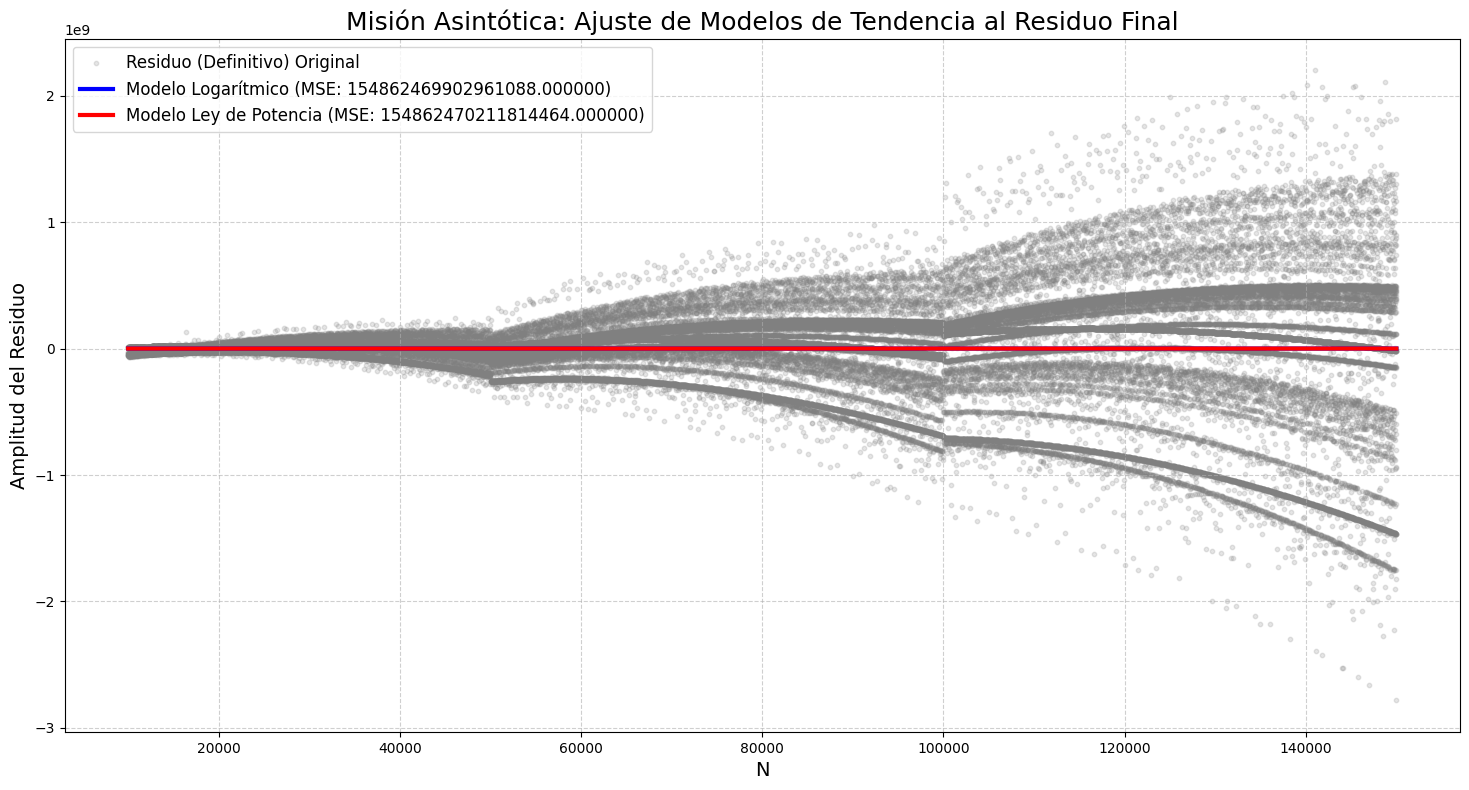



--- MISIÓN DE NORMALIZACIÓN: ESTABILIZACIÓN DE VARIANZA ---
Modelando la magnitud de la tendencia con 70003 puntos de datos...
Modelo Logarítmico (Amplitud) ajustado: a=265911006.452675, b=-2718423985.432788 | MSE: 67985244956235392.000000000
Modelo Ley de Potencia (Amplitud) ajustado: c=0.104017, γ=1.890993, d=6007271.902146 | MSE: 60686917814585064.000000000

✅ El Modelo Ley de Potencia es el mejor ajuste para la amplitud (MSE: 60686917814585064.000000000).

Residuo (Normalizado) calculado.


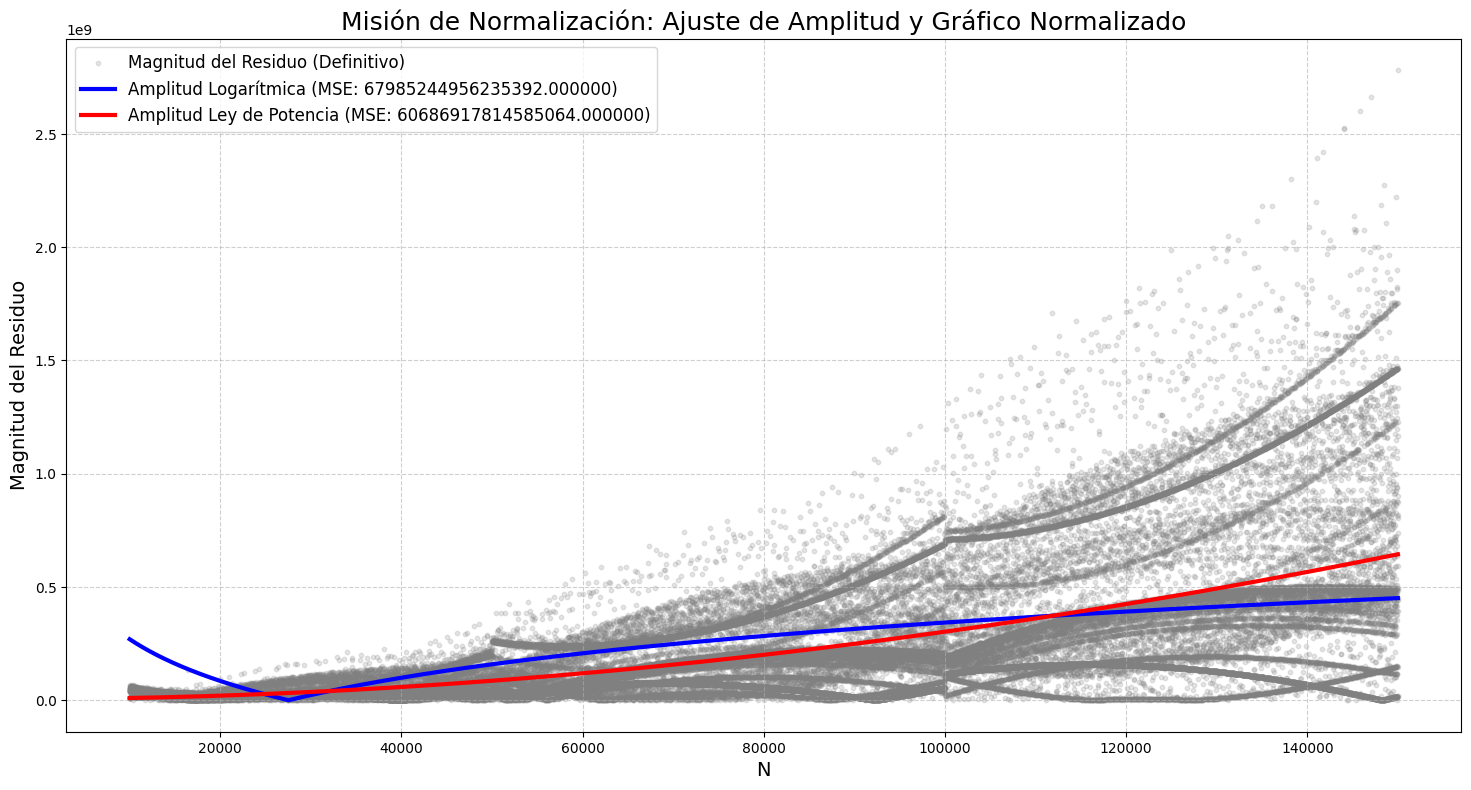

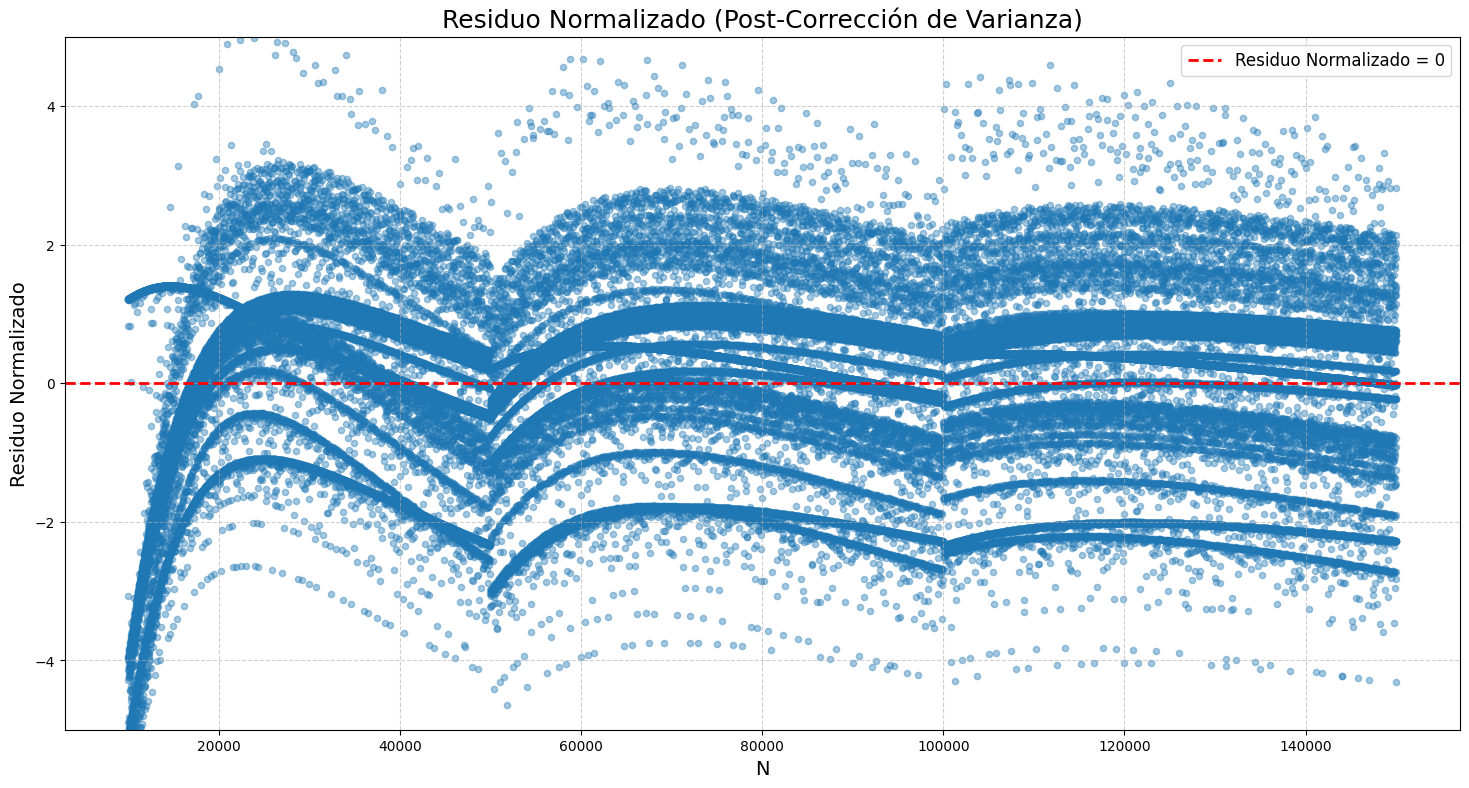


--- FIN MISIÓN DE NORMALIZACIÓN ---

DataFrame con Residuos Normalizados generado. Listo para la Misión Riemann 2.0.


In [2]:
# --- Misión de Normalización: Etapa 1 y 2 ---
# Objetivo: Modelar la magnitud de la tendencia (varianza) y normalizar los residuos.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from functools import lru_cache

# Reutilizamos las funciones de tendencia del análisis asintótico
def log_model_for_amplitude(N, a, b):
    N_safe = np.maximum(N, 1e-9)
    return np.abs(a * np.log(N_safe) + b) # Usamos el valor absoluto del modelo

def power_law_model_for_amplitude(N, c, gamma, d):
    N_safe = np.maximum(N, 1e-9)
    return np.abs(c * (N_safe**gamma) + d)

def run_normalization_mission(df: pd.DataFrame):
    """
    Realiza la misión de normalización: modela la magnitud de la tendencia
    (varianza) y normaliza los residuos.
    """
    print("\n\n--- MISIÓN DE NORMALIZACIÓN: ESTABILIZACIÓN DE VARIANZA ---")

    # 1. Cargar datos y preparar para el ajuste de magnitud
    df_norm = df.sort_values(by='N').copy()
    df_norm.dropna(subset=['N', 'Residuo (Definitivo)'], inplace=True)

    # Usar datos válidos para N > 1
    x_data = df_norm['N'].values[df_norm['N'].values > 1]
    # Tomar el valor absoluto de los residuos para modelar la magnitud/varianza
    y_data_abs = np.abs(df_norm['Residuo (Definitivo)'].values[df_norm['N'].values > 1])

    if len(x_data) == 0:
        print("No hay datos válidos de 'Residuo (Definitivo)' para N > 1 para realizar la normalización.")
        return None, None, None

    print(f"Modelando la magnitud de la tendencia con {len(x_data)} puntos de datos...")

    # 2. Ajuste de Modelos de Tendencia a los Valores Absolutos
    mse_log_amp = np.inf
    mse_power_amp = np.inf
    y_pred_log_amp = None
    y_pred_power_amp = None
    popt_log_amp = None
    popt_power_amp = None

    # Ajuste del Modelo Logarítmico para Amplitud
    try:
        # Se intenta ajustar el modelo logarítmico a los valores absolutos
        popt_log_amp, _ = curve_fit(log_model_for_amplitude, x_data, y_data_abs, p0=[1, 0], maxfev=5000)
        y_pred_log_amp = log_model_for_amplitude(x_data, *popt_log_amp)
        mse_log_amp = np.mean((y_data_abs - y_pred_log_amp)**2)
        print(f"Modelo Logarítmico (Amplitud) ajustado: a={popt_log_amp[0]:.6f}, b={popt_log_amp[1]:.6f} | MSE: {mse_log_amp:.9f}")
    except Exception as e:
        print(f"❌ Falló el ajuste del Modelo Logarítmico para amplitud: {e}")

    # Ajuste del Modelo de Ley de Potencia para Amplitud
    try:
        # Se intenta ajustar el modelo de ley de potencia a los valores absolutos
        popt_power_amp, _ = curve_fit(power_law_model_for_amplitude, x_data, y_data_abs, p0=[1, 0.1, 0], maxfev=5000)
        y_pred_power_amp = power_law_model_for_amplitude(x_data, *popt_power_amp)
        mse_power_amp = np.mean((y_data_abs - y_pred_power_amp)**2)
        print(f"Modelo Ley de Potencia (Amplitud) ajustado: c={popt_power_amp[0]:.6f}, γ={popt_power_amp[1]:.6f}, d={popt_power_amp[2]:.6f} | MSE: {mse_power_amp:.9f}")
    except Exception as e:
        print(f"❌ Falló el ajuste del Modelo Ley de Potencia para amplitud: {e}")

    # 3. Selección del Mejor Modelo de Amplitud y Normalización
    amplitude_model = None
    best_mse_amp = np.inf

    # Decidir qué modelo de amplitud es mejor basado en MSE
    if mse_log_amp < mse_power_amp and mse_log_amp != np.inf:
        best_mse_amp = mse_log_amp
        amplitude_model = lambda N: log_model_for_amplitude(N, *popt_log_amp)
        print(f"\n✅ El Modelo Logarítmico es el mejor ajuste para la amplitud (MSE: {best_mse_amp:.9f}).")
    elif mse_power_amp < np.inf:
        best_mse_amp = mse_power_amp
        amplitude_model = lambda N: power_law_model_for_amplitude(N, *popt_power_amp)
        print(f"\n✅ El Modelo Ley de Potencia es el mejor ajuste para la amplitud (MSE: {best_mse_amp:.9f}).")
    else:
        print("\n❌ No se pudo ajustar ningún modelo de amplitud de manera satisfactoria.")
        return None, None, None

    # Calcular el Residuo Normalizado si tenemos un modelo de amplitud
    if amplitude_model is not None:
        # Evitar división por cero o por valores muy pequeños en el modelo de amplitud
        amplitude_values = amplitude_model(x_data)
        # Usar un pequeño epsilon para evitar división por cero
        amplitude_values_safe = np.maximum(amplitude_values, 1e-9)

        # Obtener los residuos definitivos correspondientes a x_data
        residuo_definitivo_for_norm = df_norm['Residuo (Definitivo)'].values[df_norm['N'].values > 1]

        df_norm['Residuo (Normalizado)'] = residuo_definitivo_for_norm / amplitude_values_safe
        print("\nResiduo (Normalizado) calculado.")
    else:
        print("\nNo se pudo calcular el Residuo (Normalizado) debido a problemas en el ajuste de amplitud.")
        return None, None, None

    # 4. Generar Gráfico de Normalización
    plt.figure(figsize=(18, 9))
    plt.scatter(x_data, np.abs(residuo_definitivo_for_norm), label='Magnitud del Residuo (Definitivo)', alpha=0.2, color='gray', s=10)
    if y_pred_log_amp is not None:
        plt.plot(x_data, y_pred_log_amp, color='blue', linewidth=3, label=f'Amplitud Logarítmica (MSE: {mse_log_amp:.6f})')
    if y_pred_power_amp is not None:
        plt.plot(x_data, y_pred_power_amp, color='red', linewidth=3, label=f'Amplitud Ley de Potencia (MSE: {mse_power_amp:.6f})')

    plt.title('Misión de Normalización: Ajuste de Amplitud y Gráfico Normalizado', fontsize=18)
    plt.xlabel('N', fontsize=14)
    plt.ylabel('Magnitud del Residuo', fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

    # Generar gráfico del residuo normalizado
    plt.figure(figsize=(18, 9))
    plt.scatter(x_data, df_norm['Residuo (Normalizado)'], alpha=0.4, s=20) # Usar alpha y s para mejor visualización
    plt.axhline(0, color='red', linestyle='--', linewidth=2, label='Residuo Normalizado = 0') # Línea en cero
    plt.title('Residuo Normalizado (Post-Corrección de Varianza)', fontsize=18)
    plt.xlabel('N', fontsize=14)
    plt.ylabel('Residuo Normalizado', fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.ylim(-5, 5) # Ajustar los límites del eje Y para mejor visualización si es necesario
    plt.show()

    print("\n--- FIN MISIÓN DE NORMALIZACIÓN ---")

    # Devolver el DataFrame con el residuo normalizado para su uso posterior
    return df_norm[['N', 'Residuo (Normalizado)']] # Devolver solo N y el nuevo residuo


# --- Bloque Principal de Ejecución Modificado ---

# Comprueba si se está ejecutando en un entorno como Colab/Jupyter
if 'google.colab' in str(get_ipython()) or 'ipykernel' in str(get_ipython()):

    # --- Parámetros de la Campaña ---
    K_CONSTRAINT = 1.13  # Descubrimiento empírico: α + β ≈ 1.13

    RANGES_TO_ANALYZE = [
        (10000, 50000),
        (50000, 100000),
        (100000, 150000),
    ]

    # --- Ejecución ---
    if api_key_is_configured:
        all_results = []

        for start_range, end_range in RANGES_TO_ANALYZE:
            result_df = run_full_analysis_for_range(start_range, end_range, K_CONSTRAINT)
            if result_df is not None:
                all_results.append(result_df)

        if all_results:
            full_results_df = pd.concat(all_results, ignore_index=True)
            print(f"\n\n✅ Todos los rangos analizados. Se procesaron {len(full_results_df)} puntos de datos en total.")

            # --- Ejecutar Misión Asintótica (para obtener Residuo Definitivo) ---
            # Nota: Esta función ahora retorna el DataFrame con los resultados del ajuste de tendencia
            # pero el residuo definitivo ya está en el DataFrame full_results_df
            run_asymptotic_mission(full_results_df)

            # --- Nueva Misión de Normalización ---
            # Ahora ejecutamos la misión de normalización sobre los residuos definitivos
            normalized_df_subset = run_normalization_mission(full_results_df)

            if normalized_df_subset is not None:
                print("\nDataFrame con Residuos Normalizados generado. Listo para la Misión Riemann 2.0.")
                # Aquí se podría adjuntar el 'Residuo (Normalizado)' al full_results_df
                # o pasarlo directamente a la siguiente etapa si fuera necesario.
                # Por ahora, solo imprimimos la confirmación.
            else:
                print("\nLa Misión de Normalización no pudo completarse. No se generarán residuos normalizados.")

        else:
            print("\nNo se pudo completar el análisis jerárquico para ningún rango. La ejecución ha terminado.")

    else:
        print("\nLa ejecución se detuvo porque la API de Gemini no está configurada correctamente en la celda 2.")

✅ DataFrame con residuos normalizados encontrado. Iniciando Misión de Filtrado Digital.

Diseñando el filtro de paso alto digital...
Filtro Butterworth de orden 5 diseñado con frecuencia de corte en 0.0100.
(Tasa de muestreo promedio estimada: 0.5000 Hz)
Aplicando el filtro al Residuo (Normalizado)...


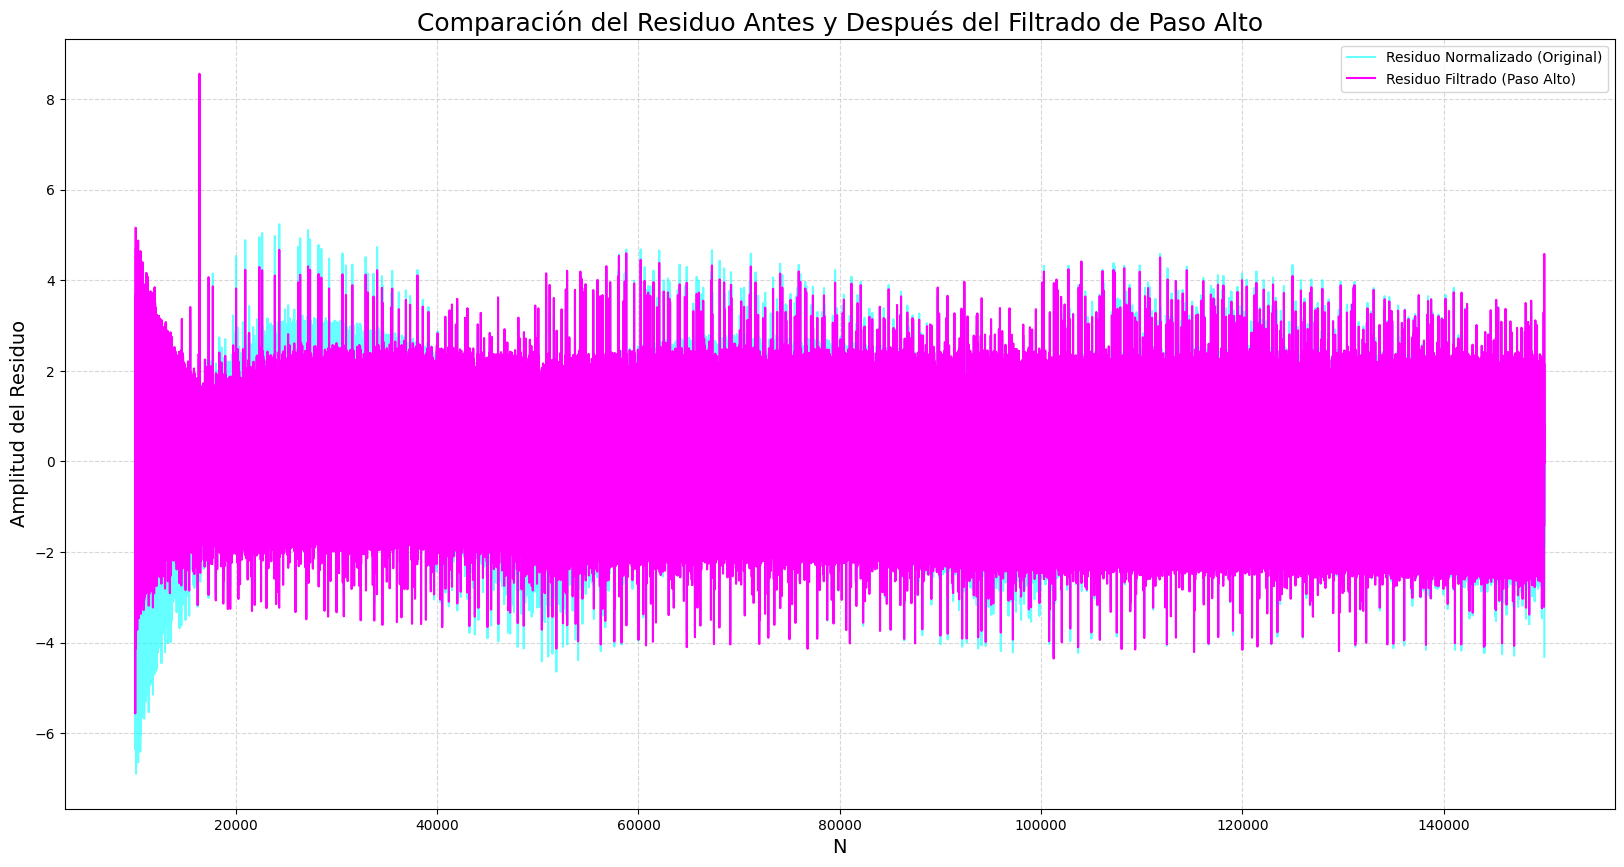


Realizando análisis espectral sobre el residuo final filtrado...
Se encontraron 0 picos de frecuencia significativos en la señal filtrada.


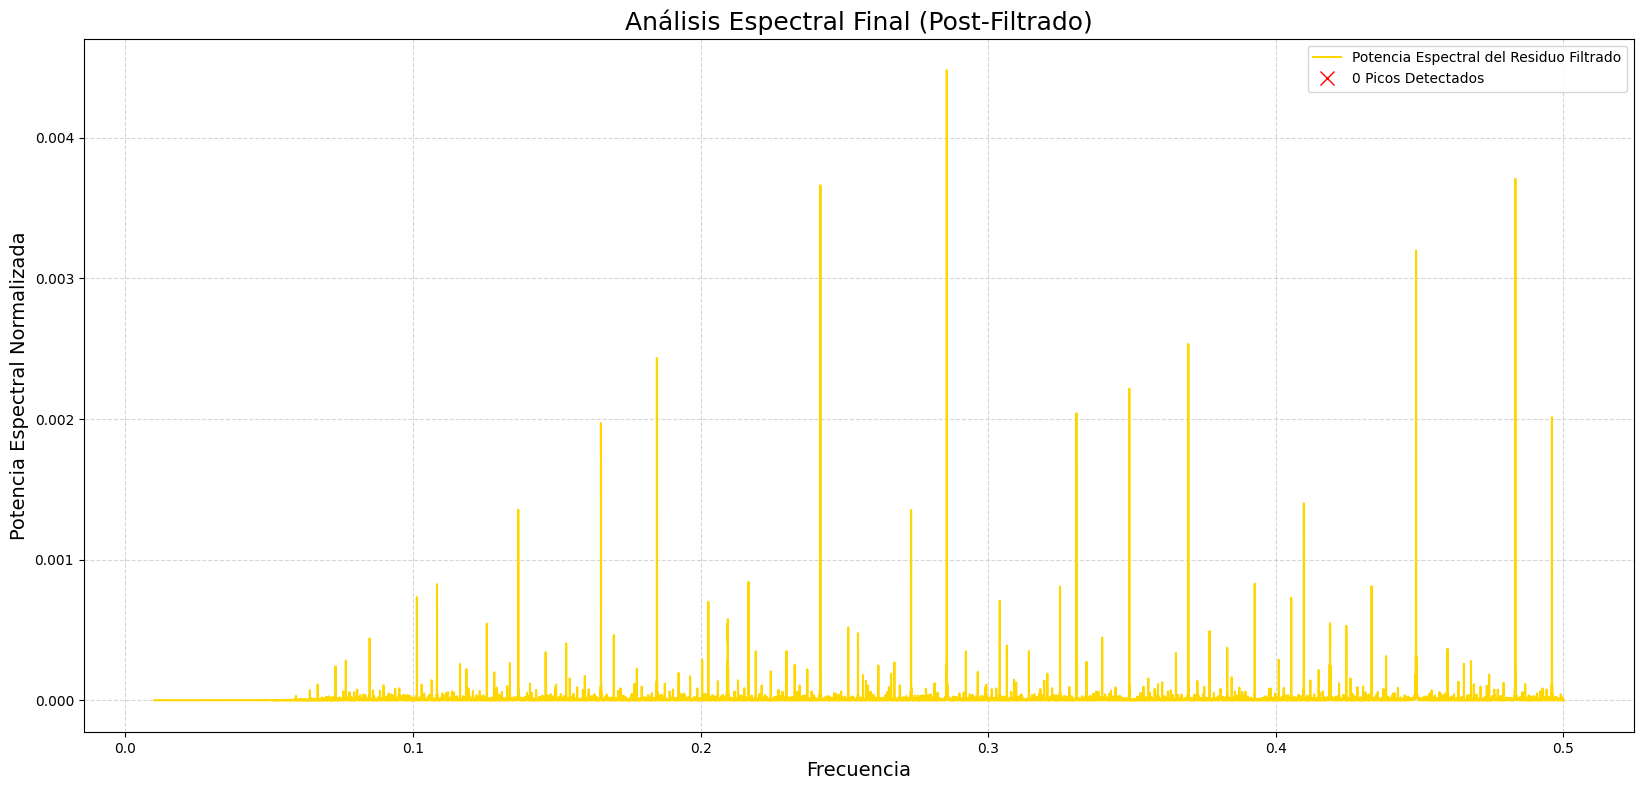


Frecuencias más prominentes en la señal final filtrada (ordenadas por potencia):
No se encontraron picos de frecuencia significativos después del filtrado.


In [4]:
# ==============================================================================
#  ATHENA PRIME - MISIÓN DE FILTRADO DIGITAL
# ==============================================================================
#
#  Objetivo: Aplicar un filtro de paso alto al 'Residuo (Normalizado)' para
#  eliminar los artefactos de baja frecuencia y aislar la señal de Riemann.
#
# ==============================================================================

#@title Misión de Filtrado Digital: Diseño, Aplicación y Análisis Final
# ------------------------------------------------------------------------------
# Se importan las librerías necesarias para el diseño de filtros digitales.
# ------------------------------------------------------------------------------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt, lombscargle, find_peaks

# --- Verificación de Datos ---
# Nos aseguramos de que el DataFrame de la misión anterior exista.
if 'normalized_df_subset' not in locals() or not isinstance(normalized_df_subset, pd.DataFrame):
    print("❌ ERROR: El DataFrame `normalized_df_subset` no se encontró.")
    print("Por favor, ejecuta primero el script de la 'Misión de Normalización'.")
else:
    print("✅ DataFrame con residuos normalizados encontrado. Iniciando Misión de Filtrado Digital.")

    # --- 1. Preparación de Datos ---
    df_filter = normalized_df_subset.dropna().sort_values(by='N').copy()

    t = df_filter['N'].values
    y = df_filter['Residuo (Normalizado)'].values

    # --- 2. Diseño del Filtro de Paso Alto (Butterworth) ---
    print("\nDiseñando el filtro de paso alto digital...")

    # Para un filtro digital, necesitamos una frecuencia de muestreo (fs).
    # Como nuestros datos no son uniformes, usamos la tasa de muestreo promedio.
    avg_step = np.mean(np.diff(t))
    fs = 1.0 / avg_step

    # Parámetros del filtro
    cutoff_frequency = 0.01  # Umbral de corte. Eliminaremos todo por debajo de esta frecuencia.
    filter_order = 5         # Orden del filtro. Un orden más alto da un corte más abrupto.

    # Normalizamos la frecuencia de corte respecto a la frecuencia de Nyquist (fs / 2)
    normalized_cutoff = cutoff_frequency / (0.5 * fs)

    # Obtenemos los coeficientes del filtro (numerador b, denominador a)
    b, a = butter(filter_order, normalized_cutoff, btype='high', analog=False)

    print(f"Filtro Butterworth de orden {filter_order} diseñado con frecuencia de corte en {cutoff_frequency:.4f}.")
    print(f"(Tasa de muestreo promedio estimada: {fs:.4f} Hz)")

    # --- 3. Aplicación del Filtro ---
    # Usamos filtfilt para un filtrado de fase cero, que no desplaza la señal.
    print("Aplicando el filtro al Residuo (Normalizado)...")
    y_filtered = filtfilt(b, a, y)

    df_filter['Residuo (Filtrado)'] = y_filtered

    # --- 4. Visualización Comparativa ---
    plt.figure(figsize=(20, 10))
    plt.plot(t, y, label='Residuo Normalizado (Original)', color='cyan', alpha=0.6)
    plt.plot(t, y_filtered, label='Residuo Filtrado (Paso Alto)', color='magenta', linewidth=1.5)
    plt.title('Comparación del Residuo Antes y Después del Filtrado de Paso Alto', fontsize=18)
    plt.xlabel('N', fontsize=14)
    plt.ylabel('Amplitud del Residuo', fontsize=14)
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()

    # --- 5. Análisis Espectral Final sobre la Señal Filtrada ---
    print("\nRealizando análisis espectral sobre el residuo final filtrado...")

    # Rango de frecuencias a escanear. Lo extendemos para buscar señales de mayor frecuencia.
    f_final = np.linspace(cutoff_frequency, 0.5, 50000)

    power_final = lombscargle(t, y_filtered, f_final, normalize=True)

    # Detección de picos
    peaks_final, properties_final = find_peaks(power_final, height=0.005, prominence=0.001)

    print(f"Se encontraron {len(peaks_final)} picos de frecuencia significativos en la señal filtrada.")

    # Visualización del espectro final
    plt.figure(figsize=(20, 9))
    plt.plot(f_final, power_final, color='gold', label='Potencia Espectral del Residuo Filtrado')
    plt.plot(f_final[peaks_final], power_final[peaks_final], "x", color='red', markersize=10, label=f'{len(peaks_final)} Picos Detectados')

    plt.title('Análisis Espectral Final (Post-Filtrado)', fontsize=18)
    plt.xlabel('Frecuencia', fontsize=14)
    plt.ylabel('Potencia Espectral Normalizada', fontsize=14)
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()

    # Reporte de frecuencias finales
    print("\nFrecuencias más prominentes en la señal final filtrada (ordenadas por potencia):")
    if len(peaks_final) > 0:
        sorted_peak_indices_final = np.argsort(properties_final['peak_heights'])[::-1]

        for i in sorted_peak_indices_final:
            freq = f_final[peaks_final[i]]
            height = power_final[peaks_final[i]]
            print(f"- Frecuencia: {freq:.6f} (Potencia: {height:.4f})")
    else:
        print("No se encontraron picos de frecuencia significativos después del filtrado.")